##### VeriSeti
 Yahoo Finance uzerinden yfinance kutuphanesi kullanilarak amazon hissesi cekilmis ve kullanilmistir 


#### 214210050 Furkan Demircan
#### 214210056 Eren Elagöz

In [1]:
# Kütüphaneler
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Tesla verilerini Yahoo Finance üzerinden çekelim
ticker = 'AMZN'
df = yf.download(ticker, start='2014-01-01', end='2024-05-26')


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Veri setinin ilk 5 verisinin ekrana yazdirilmasi
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.940001,19.9680,19.701000,19.898500,19.898500,42756000
2014-01-03,19.914499,20.1355,19.811001,19.822001,19.822001,44204000
2014-01-06,19.792500,19.8500,19.421000,19.681499,19.681499,63412000
2014-01-07,19.752001,19.9235,19.714500,19.901501,19.901501,38320000
2014-01-08,19.923500,20.1500,19.802000,20.096001,20.096001,46330000


In [4]:
# Veri setinin son 5 verisinin ekrana yazdirilmasi
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-20,184.339996,186.669998,183.279999,183.539993,183.539993,30511800
2024-05-21,182.300003,183.259995,180.750000,183.149994,183.149994,50839100
2024-05-22,183.880005,185.220001,181.970001,183.130005,183.130005,28148800
2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200
2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100


In [5]:
# Veri setinin boyutuna bakilmasi
df.shape

(2617, 6)

In [6]:
# Veri setindeki benzersiz verilerin sayisinin gosterilmesi
df.nunique()

Open         2516
High         2551
Low          2558
Close        2576
Adj Close    2576
Volume       2574
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,87.861715,88.868495,86.764430,87.835829,87.835829,7.879039e+07
std,53.308641,53.941367,52.624092,53.274107,53.274107,4.153847e+07
min,14.220000,14.521000,14.200000,14.347500,14.347500,1.762600e+07
25%,37.620499,37.875000,37.176498,37.528500,37.528500,5.284400e+07
50%,88.500000,89.400002,87.459999,88.443497,88.443497,6.755000e+07
75%,134.253494,136.089996,133.210007,134.643494,134.643494,9.157000e+07
max,189.160004,191.699997,187.440002,189.500000,189.500000,4.771220e+08


In [8]:
#verisetinin detaylarinin gosterilmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2617 entries, 2014-01-02 to 2024-05-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2617 non-null   float64
 1   High       2617 non-null   float64
 2   Low        2617 non-null   float64
 3   Close      2617 non-null   float64
 4   Adj Close  2617 non-null   float64
 5   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 143.1 KB


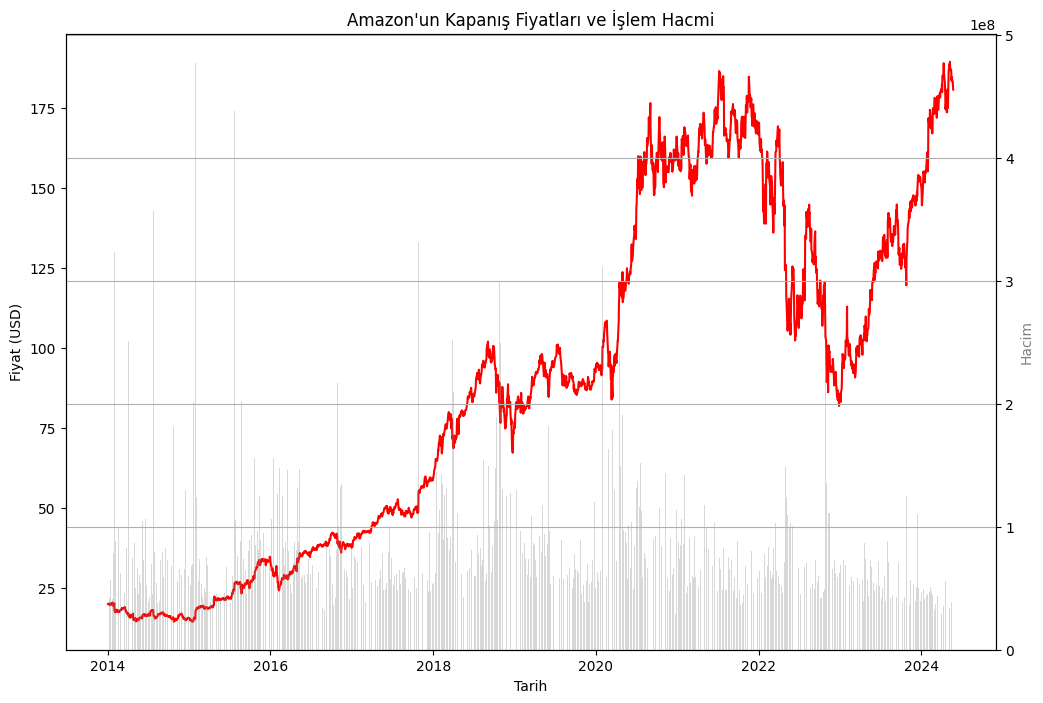

In [9]:
# 5 Mayis 2019dan gunumuze hisse fiyatinin kapanis degerleri ve islem hacmi tablosu


df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df['Date'], df['Adj Close'], color='red')
ax1.set_xlabel('Tarih')
ax1.set_ylabel('Fiyat (USD)')

ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], alpha=0.3, color='gray')
ax2.set_ylabel('Hacim', color='gray')

plt.title("Amazon'un Kapanış Fiyatları ve İşlem Hacmi")
plt.grid(True)
plt.show()

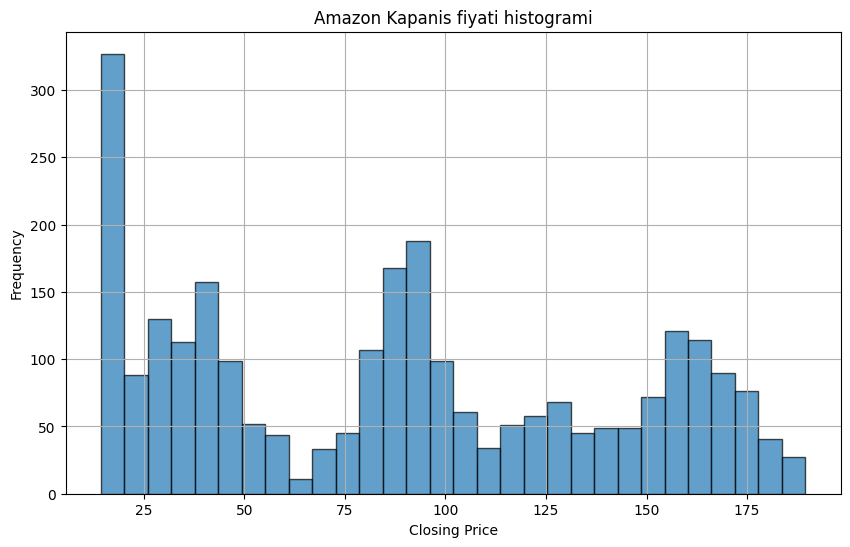

In [10]:
# Kapanış fiyatlarının histogramını çizme
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Amazon Kapanis fiyati histogrami')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

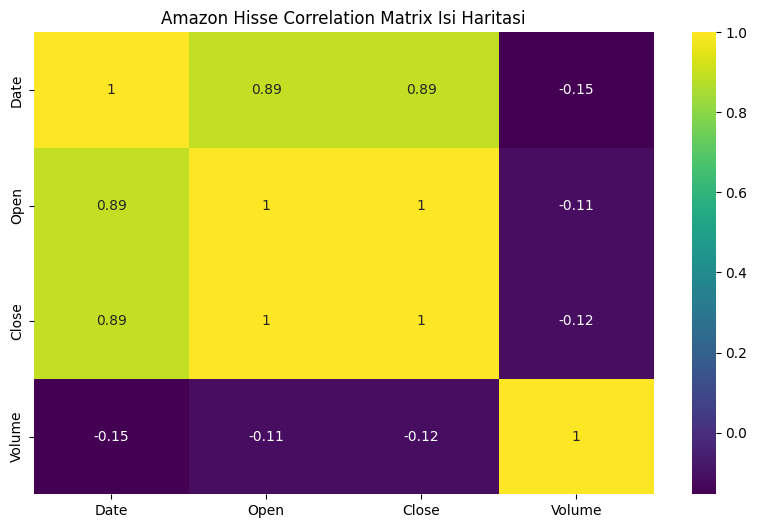

In [11]:
# Gerekli ve kullanilacak olan sutunlarin alinmasi
df.reset_index(inplace=True)  # 'Date' sütunu oluşturmak için index'i sıfırlıyoruz
df = df[['Date', 'Open', 'Close', 'Volume']]

# Korelasyon matrisini hesaplama
corr_matrix = df.corr()

# Isı haritasını çizme
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Amazon Hisse Correlation Matrix Isi Haritasi')
plt.show()

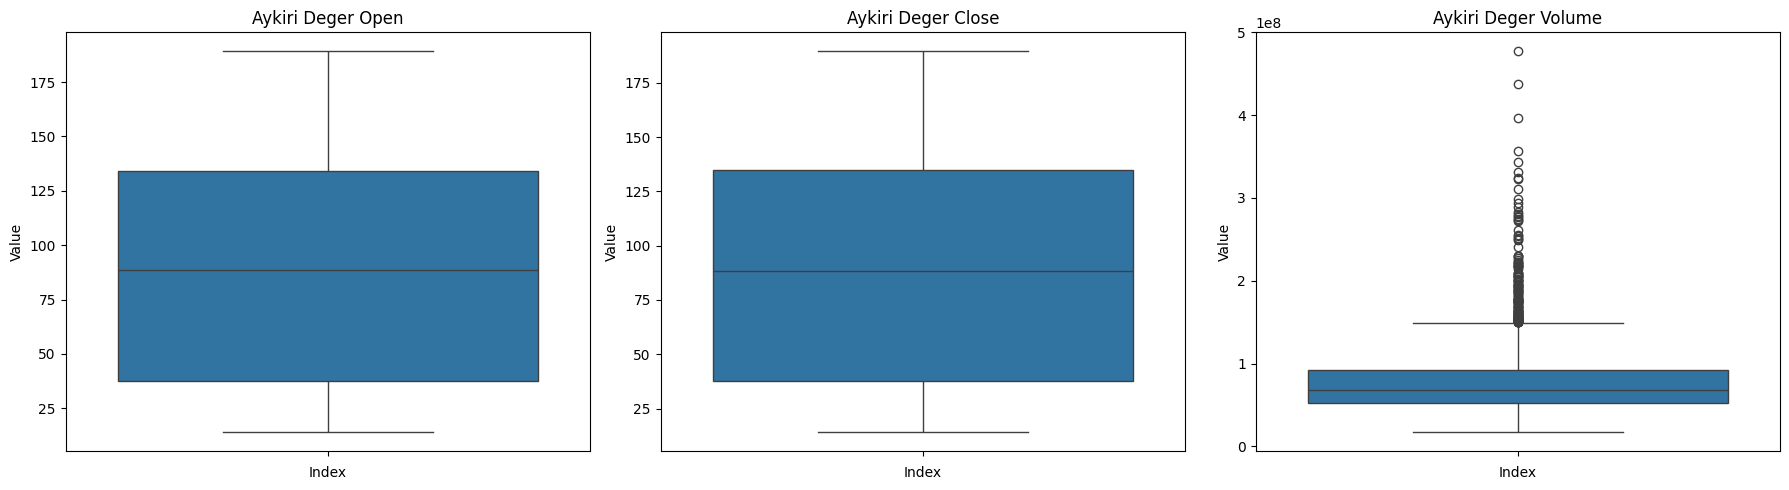

In [12]:
# Aykırı değerlerin görselleştirilmesi 
features = ['Open', 'Close', 'Volume']

#grafiklerin yan yana koyulmasi 
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Aykiri Deger {feature}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

#### veri hazirlama

In [13]:
# Bos degerlerin kontrol edilmesi
df.isnull().sum()


Date      0
Open      0
Close     0
Volume    0
dtype: int64

In [14]:
# Verileri hazırlama
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

#Bagimsiz(X) ve Bagimli(y) degiskeni belirleme
X = df[['Open', 'Close', 'Volume']]
y = df['Close']

# Verileri normalize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\furka\AppData\Local\Temp\ipykernel_16704\2715252421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].map(pd.Timestamp.toordinal)


polinomal regresyon

In [15]:
# Polynomial degerlerin oluşturulmasi
degree = 2  # Polinom derecesi
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

In [16]:
# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=49)

# Test ve Egitim verilerinin boyutunu gorme 
x_train=X_train.T
x_test=X_test.T
y_train=y_train.T
y_test=y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (10, 2093)
x_test:  (10, 524)
y_train:  (2093,)
y_test:  (524,)


In [17]:
# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Tahminleri yapma
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [19]:
# Eğitim ve test hatalarını hesaplama
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R^2 skorları
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# MAPE  (Ortalama mutlak yüzde hatası)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100



print(f'MAPE: {mape}%')
print(f'Train MSE: {train_mse}, Train R^2: {train_r2:}')
print(f'Test MSE: {test_mse}, Test R^2: {test_r2}')

MAPE: 2.122499907521627e-13%
Train MSE: 9.378491031248803e-27, Train R^2: 1.0
Test MSE: 8.762401974280269e-27, Test R^2: 1.0


In [20]:
# Son 1 ayın verilerini alalım
last_month_data = df[df['Date'] >= df['Date'].max() - 30]

# Son 1 ayın min ve max değerlerini alalım
open_min = last_month_data['Open'].min()
open_max = last_month_data['Open'].max()
close_min = last_month_data['Close'].min()
close_max = last_month_data['Close'].max()
volume_min = last_month_data['Volume'].min()
volume_max = last_month_data['Volume'].max()

In [21]:
future_dates = pd.date_range(start='2024-05-26', end='2024-07-01')
future_open_prices = np.random.uniform(low=open_min, high=open_max, size=len(future_dates))  # Son 1 ayın min ve max değerleri arasında rastgele açılış fiyatları
future_close_prices = np.random.uniform(low=close_min, high=close_max, size=len(future_dates))  # Son 1 ayın min ve max değerleri arasında rastgele kapanış fiyatları
future_volumes = np.random.uniform(low=volume_min, high=volume_max, size=len(future_dates))  # Son 1 ayın min ve max değerleri arasında rastgele hacimler


# Gelecek verileri hazırlama
future_data = pd.DataFrame({
    'Date': future_dates,
    'Open': future_open_prices,
    'Close': future_close_prices,
    'Volume': future_volumes
})

In [22]:
# Gelecek verileri normalize etme
X_future = future_data[['Open', 'Close', 'Volume']]
X_future_scaled = scaler.transform(X_future)

# Polynomial features kullanarak tahmin yapma
X_future_poly = poly_features.transform(X_future_scaled)  # Gelecek verileri normalize ederek polynomial features oluşturma
future_data['Predicted Close'] = model.predict(X_future_poly)

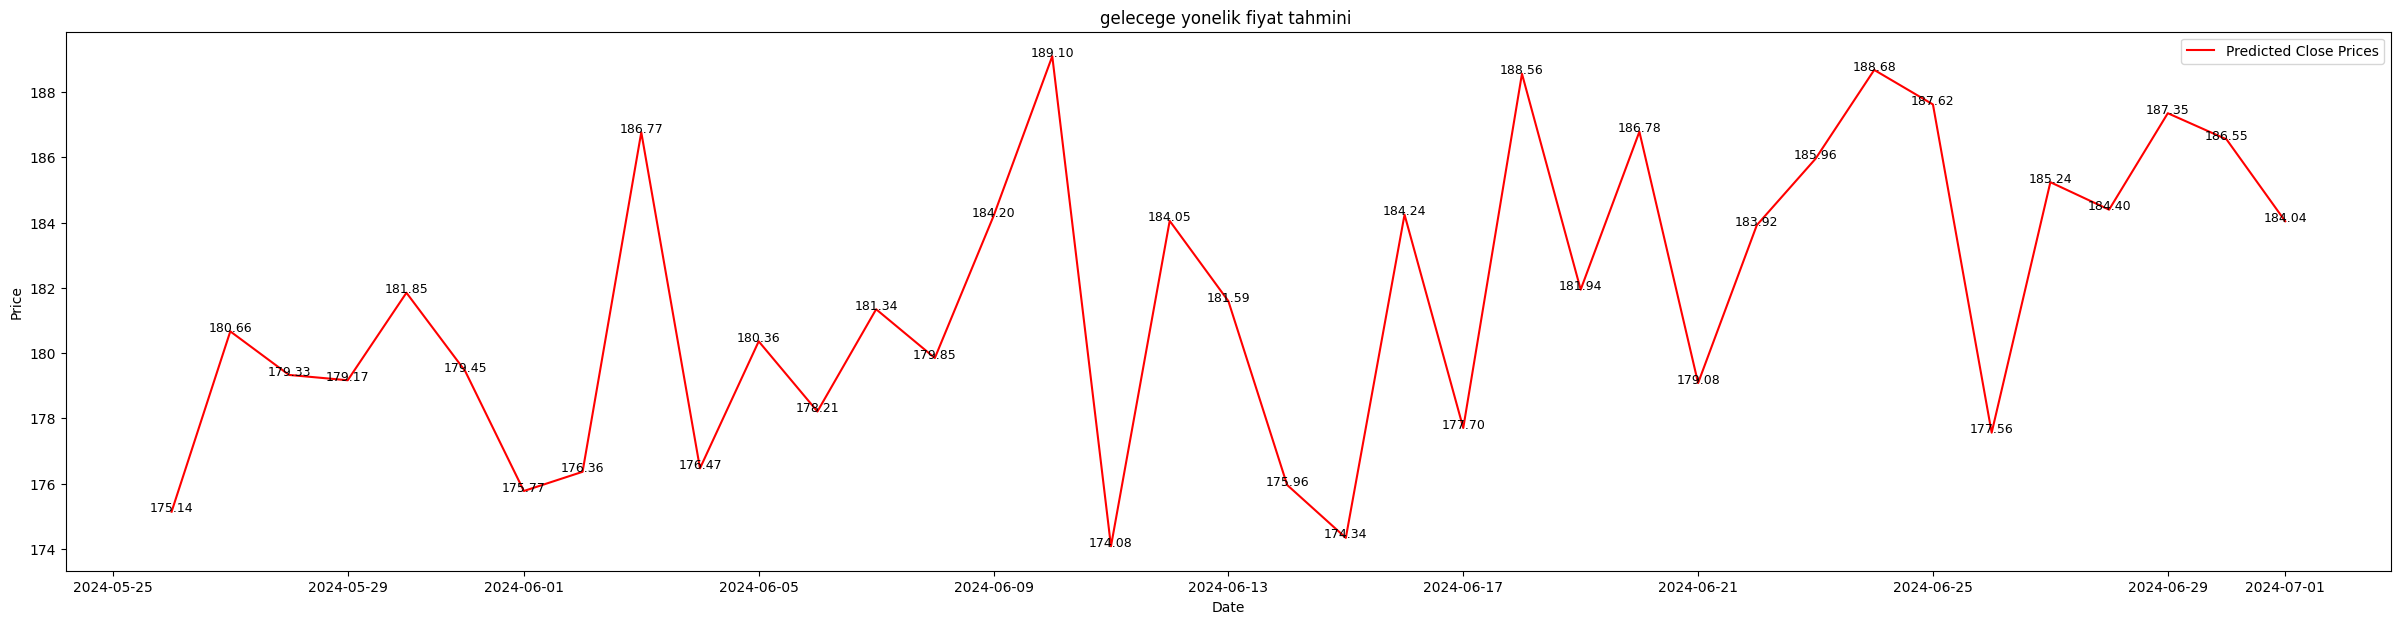

In [23]:
# Grafik olarak çizme
plt.figure(figsize=(30, 7))
plt.plot(future_data['Date'], future_data['Predicted Close'], label='Predicted Close Prices', linestyle='-', color='red')

# Her bir veri noktasının üzerine tahmin edilen fiyatları ekleme
for i in range(len(future_data)):
    plt.text(future_data['Date'].iloc[i], future_data['Predicted Close'].iloc[i], 
             f"{future_data['Predicted Close'].iloc[i]:.2f}", fontsize=9, ha='center')

 # Tahmin edilen verilerin tabloda gosterimi
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('gelecege yonelik fiyat tahmini ')
plt.legend()
plt.show()